# Garching Supernova Neutrino Fluxes

The Garching supernova neutrino fluxes are saved in 300 files, each represents the energy spectrum in the particular time.

This notebook is to read in all the Garching supernova neutrino fluxes, merge across all the time bins, and rebin to 100 energy bins.  It deals with only the normal ordering case and the non-oscillation case.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Garching flux files with Normal Ordering

In [2]:
df_list = [ pd.read_csv(f'/Users/yuntse/data/supernova/garching/garching_fluxes_log/nh/pinched_{i}.dat', header = None, 
                        sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'nuebar', 'numubar', 'nutaubar' ]) for i in range(300) ]

In [3]:
for i in range(300):
    df_list[i]['t'] = i

In [4]:
df = pd.concat(df_list, ignore_index = True)
df

,E,nue,numu,nutau,nuebar,numubar,nutaubar,t
0,0.0000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
1,0.0002,0.0,2.149720e-01,2.149720e-01,0.000000e+00,0.000000e+00,0.000000e+00,0
2,0.0004,0.0,5.470260e+00,5.470260e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3,0.0006,0.0,3.425630e+01,3.425630e+01,0.000000e+00,0.000000e+00,0.000000e+00,0
4,0.0008,0.0,1.208320e+02,1.208320e+02,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...
150295,0.0992,0.0,1.076570e-14,1.076570e-14,1.877110e-13,4.177370e-14,4.177370e-14,299
150296,0.0994,0.0,9.617710e-15,9.617710e-15,1.686510e-13,3.753210e-14,3.753210e-14,299
150297,0.0996,0.0,8.592010e-15,8.592010e-15,1.515250e-13,3.372090e-14,3.372090e-14,299
150298,0.0998,0.0,7.675620e-15,7.675620e-15,1.361370e-13,3.029630e-14,3.029630e-14,299


In [5]:
totalNue = df.groupby('E').nue.sum()

In [6]:
totalNue

E
0.0000    0.000000e+00
0.0002    3.046414e+06
0.0004    1.480679e+07
0.0006    3.637389e+07
0.0008    6.754481e+07
              ...     
0.0992    7.101720e+00
0.0994    6.755967e+00
0.0996    6.426991e+00
0.0998    6.113982e+00
0.1000    5.816171e+00
Name: nue, Length: 501, dtype: float64

In [7]:
type(totalNue)

pandas.core.series.Series

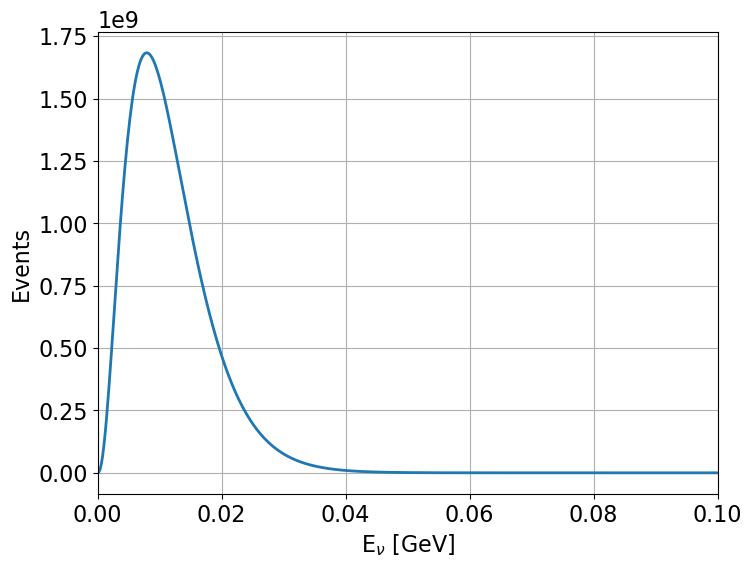

In [8]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.plot( totalNue.index, totalNue, lw = 2)
ax.set_xlabel( r'E$_\nu$ [GeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim( [0, 0.1])

ax.grid(":")

Sanity checks

In [9]:
df[df['E']==0.014]['nue'].sum()

1100545807.0

In [10]:
totalNue.iloc[70]

1100545807.0

In [11]:
totalNue.index[70]

0.014

Rebinning

In [18]:
totalNue100 = totalNue.to_numpy()[:500].reshape(500//5, 5).sum(axis =1)
np.set_printoptions(formatter={'float': lambda x: f"{x}"})
totalNue100/1.e7

array([12.17719013358, 107.95830798400002, 274.34024718,
       454.1517404499999, 610.91117862, 728.08780956, 802.05931838,
       836.2711492, 837.3735298, 812.9236587, 770.1434389, 715.3298738,
       653.6461348, 589.1242101, 524.7717353, 462.72361968999996,
       404.40229585, 350.66921012999995, 301.95852851000006,
       258.38996091999996, 219.86080774, 186.11902274000002, 156.81954938,
       131.56692354, 109.94602059, 91.54413692, 75.965526047,
       62.840810201, 51.832204476, 42.635805919999996, 34.981795124,
       28.633302851200003, 23.384351055200003, 19.0572859817,
       15.4999789782, 12.58298288302, 10.19677636952, 8.24916439195,
       6.662888016079999, 5.37348086352, 4.327349522601,
       3.4800990503080005, 2.7950711677670004, 2.242084298349,
       1.796360723328, 1.4376083306885001, 1.1492503507103,
       0.9177745550976999, 0.7321899222338001, 0.58357362206816,
       0.46469575396954993, 0.36970789816630995, 0.29388725543176997,
       0.23342586902241,

In [14]:
E100 = np.arange(0.0, 0.1, 0.001)+0.0005
E100

array([0.0005, 0.0015, 0.0025, 0.0035, 0.0045, 0.0055, 0.0065, 0.0075,
       0.0085, 0.0095, 0.0105, 0.0115, 0.0125, 0.0135, 0.0145, 0.0155,
       0.0165, 0.0175, 0.0185, 0.0195, 0.0205, 0.0215, 0.0225, 0.0235,
       0.0245, 0.0255, 0.0265, 0.0275, 0.0285, 0.0295, 0.0305, 0.0315,
       0.0325, 0.0335, 0.0345, 0.0355, 0.0365, 0.0375, 0.0385, 0.0395,
       0.0405, 0.0415, 0.0425, 0.0435, 0.0445, 0.0455, 0.0465, 0.0475,
       0.0485, 0.0495, 0.0505, 0.0515, 0.0525, 0.0535, 0.0545, 0.0555,
       0.0565, 0.0575, 0.0585, 0.0595, 0.0605, 0.0615, 0.0625, 0.0635,
       0.0645, 0.0655, 0.0665, 0.0675, 0.0685, 0.0695, 0.0705, 0.0715,
       0.0725, 0.0735, 0.0745, 0.0755, 0.0765, 0.0775, 0.0785, 0.0795,
       0.0805, 0.0815, 0.0825, 0.0835, 0.0845, 0.0855, 0.0865, 0.0875,
       0.0885, 0.0895, 0.0905, 0.0915, 0.0925, 0.0935, 0.0945, 0.0955,
       0.0965, 0.0975, 0.0985, 0.0995])

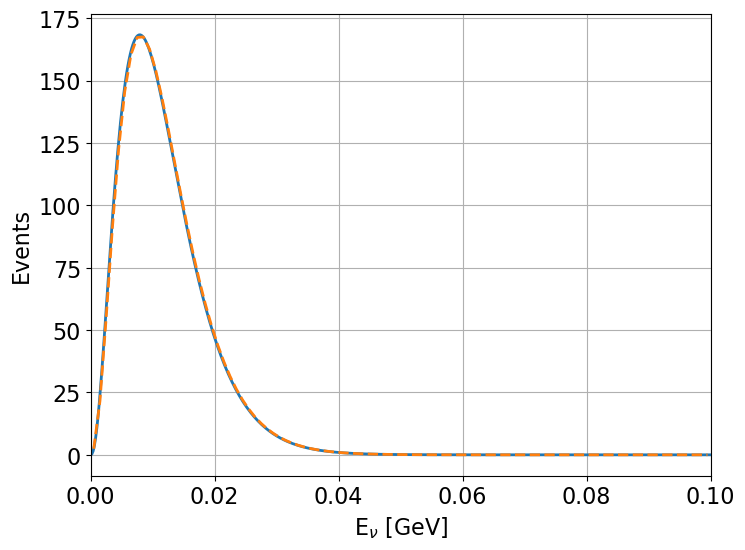

In [15]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.plot( totalNue.index, totalNue/1.e7, lw = 2)
ax.plot( E100, totalNue100/5e7, lw = 2, linestyle = '--')
ax.set_xlabel( r'E$_\nu$ [GeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim( [0, 0.1])

ax.grid(":")

## Garching flux files without oscillation

In [16]:
df_list = [ pd.read_csv(f'/Users/yuntse/data/supernova/garching/garching_fluxes_log/pinched_{i}.dat', header = None, 
                        sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'nuebar', 'numubar', 'nutaubar' ]) for i in range(300) ]

In [17]:
for i in range(300):
    df_list[i]['t'] = i

In [18]:
df = pd.concat(df_list, ignore_index = True)

In [19]:
totalNue = df.groupby('E').nue.sum()

Rebinning

In [20]:
totalNue100 = totalNue.to_numpy()[:500].reshape(500//5, 5).sum(axis =1)
totalNue100/1.e7

array([8.86349135e+00, 1.24566518e+02, 4.10223654e+02, 7.87728027e+02,
       1.15025579e+03, 1.42326862e+03, 1.57641095e+03, 1.61342912e+03,
       1.55697208e+03, 1.43603294e+03, 1.27809005e+03, 1.10535937e+03,
       9.33803487e+02, 7.73648677e+02, 6.30530713e+02, 5.06750328e+02,
       4.02387048e+02, 3.16176983e+02, 2.46151276e+02, 1.90069324e+02,
       1.45692421e+02, 1.10941486e+02, 8.39755256e+01, 6.32185803e+01,
       4.73554907e+01, 3.53105542e+01, 2.62180973e+01, 1.93908520e+01,
       1.42893709e+01, 1.04944273e+01, 7.68301989e+00, 5.60817565e+00,
       4.08233046e+00, 2.96390916e+00, 2.14663923e+00, 1.55114391e+00,
       1.11840843e+00, 8.04740677e-01, 5.77918687e-01, 4.14263945e-01,
       2.96434107e-01, 2.11766885e-01, 1.51043522e-01, 1.07570544e-01,
       7.65001969e-02, 5.43298474e-02, 3.85343385e-02, 2.72970695e-02,
       1.93137359e-02, 1.36496354e-02, 9.63609179e-03, 6.79556329e-03,
       4.78754885e-03, 3.36962514e-03, 2.36944622e-03, 1.66465606e-03,
      

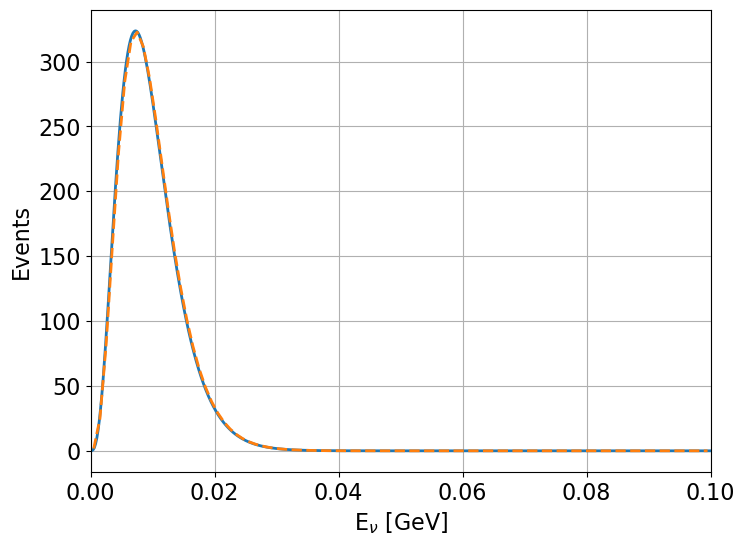

In [21]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.plot( totalNue.index, totalNue/1.e7, lw = 2)
ax.plot( E100, totalNue100/5.e7, lw = 2, linestyle = '--')
ax.set_xlabel( r'E$_\nu$ [GeV]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim( [0, 0.1])

ax.grid(":")

In [26]:
np.arange(0., 100, 1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])